In [1]:
from agents import manager, user_proxy
import pandas as pd
import matplotlib.pyplot as plt
ara_pheno_path = './data_for_eval/aracrop_phenotypes.csv'
potato_pheno_path = './data_for_eval/potato_metadata.csv'

/home/fchen2/RDS/anaconda3/envs/llm/lib/python3.11/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/fchen2/RDS/anaconda3/envs/llm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/fchen2/RDS/anaconda3/envs/llm/lib/python3.11/site-packages/transformers/utils/hub.py:128: FutureWarning:

In [2]:
# Task 1: Extracting Values
task = f'''
Given {ara_pheno_path}, determine the maximum leaf count and the corresponding plant id at day 26.
'''
res = user_proxy.initiate_chat(recipient=manager, message=task,)
# correct

Admin (to manager):


Given ./data_for_eval/aracrop_phenotypes.csv, determine the maximum leaf count and the corresponding plant id at day 26.


--------------------------------------------------------------------------------
manager (to Admin):

***** Suggested tool call (call_xoJR6L4wav1GmXwHnF4WqGJQ): query_csv *****
Arguments: 
{"message":"What is the maximum leaf count and the corresponding plant id at day 26?","file_path":"./data_for_eval/aracrop_phenotypes.csv"}
**************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION query_csv...
{'type': 'dataframe', 'value':    max_leaf_count  corresponding_plant_id
0              20                       5}
Admin (to manager):

Admin (to manager):

***** Response from calling tool (call_xoJR6L4wav1GmXwHnF4WqGJQ) *****
   max_leaf_count  corresponding_

In [3]:
# Task 1 evaluation
df = pd.read_csv(ara_pheno_path)
# Filter rows where day == 26
df_day26 = df[df['days_after_sowing'] == 26]
# Find the maximum leaf count at day 26
max_leaf_count = df_day26['leaf_count'].max()
# Create a subset of the DataFrame with all rows that have the maximum leaf count
df_day26_max = df_day26[df_day26['leaf_count'] == max_leaf_count]
# Extract all plant_ids for those rows
max_plant_ids = df_day26_max['plant_id'].unique().tolist()
print("Maximum leaf count:", max_leaf_count)
print("Plant IDs with the maximum leaf count:", max_plant_ids)

Maximum leaf count: 20
Plant IDs with the maximum leaf count: [5]


In [4]:
# Task 2: Extracting Values
task = f'''
Given {ara_pheno_path}, determine the minimum leaf count and the corresponding plant id at day 1.
'''
res = user_proxy.initiate_chat(recipient=manager, message=task,)
# correct

Admin (to manager):


Given ./data_for_eval/aracrop_phenotypes.csv, determine the minimum leaf count and the corresponding plant id at day 1.


--------------------------------------------------------------------------------
manager (to Admin):

***** Suggested tool call (call_tNeq1qoXmFgxJw5Niwzrybhy): query_csv *****
Arguments: 
{"message":"What is the minimum leaf count and the corresponding plant id at day 1?","file_path":"./data_for_eval/aracrop_phenotypes.csv"}
**************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION query_csv...
{'type': 'string', 'value': 'The minimum leaf count at day 1 is 1 and the corresponding plant id is 16.'}
Admin (to manager):

Admin (to manager):

***** Response from calling tool (call_tNeq1qoXmFgxJw5Niwzrybhy) *****
The minimum leaf count at day 1 is 1 and the 

In [8]:
# Task 2 evaluation
df = pd.read_csv(ara_pheno_path)
df_day1 = df[df['days_after_sowing'] == 1]
min_leaf_count = df_day1['leaf_count'].min()
df_day1_min = df_day1[df_day1['leaf_count'] == min_leaf_count]
min_plant_ids = df_day1_min['plant_id'].unique().tolist()
print("Minimum leaf count:", min_leaf_count)
print("Plant IDs with the minimum leaf count:", min_plant_ids)

Minimum leaf count: 1
Plant IDs with the minimum leaf count: [16]


In [9]:
# Task 3: Extracting Values
task = f'''
Given {potato_pheno_path}, find the maximum manually measured dried weight in variety Voyager and the corresponding file name.
'''
res = user_proxy.initiate_chat(recipient=manager, message=task,)

Admin (to manager):


Given ./data_for_eval/potato_metadata.csv, find the maximum manually measured dried weight in variety Voyager and the corresponding file name.


--------------------------------------------------------------------------------
manager (to Admin):

***** Suggested tool call (call_DymuuhHAaseRzBuUr1lXe0zp): query_csv *****
Arguments: 
{"message":"What is the maximum manually measured dried weight in variety Voyager and the corresponding file name?","file_path":"./data_for_eval/potato_metadata.csv"}
**************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION query_csv...
{'type': 'string', 'value': 'The maximum manually measured dried weight in variety Voyager is 0.0624 and the corresponding file name is ./data/PotatoLeaf/IMG_8167.JPG.'}
Admin (to manager):

Admin (to manager):

*

In [10]:
# Task 3 evaluation
df = pd.read_csv(potato_pheno_path)
# Filter the DataFrame to only include rows where variety == "Voyager"
df_voyager = df[df['Variety'] == 'voyager']
# Find the minimum manually measured dried weight for variety Voyager
max_dried_weight = df_voyager['manual_dried_weight'].max()

# Find all rows with this minimum dried weight
max_weight_rows = df_voyager[df_voyager['manual_dried_weight'] == max_dried_weight]

# Extract the file name(s) for those rows
file_names = max_weight_rows['file_name'].unique()

# Print results
print(f"Maximum manually measured dried weight in variety Voyager: {max_dried_weight}")
print("Corresponding file name(s):")
for f in file_names:
    print(f)

Maximum manually measured dried weight in variety Voyager: 0.0624
Corresponding file name(s):
./data/PotatoLeaf/IMG_8167.JPG


In [11]:
# Task 4: Extracting Values
task = f'''
Given {potato_pheno_path}, find the minimum manually measured dried weight in variety Voyager and the corresponding file name.
'''
res = user_proxy.initiate_chat(recipient=manager, message=task,)
# correct

Admin (to manager):


Given ./data_for_eval/potato_metadata.csv, find the minimum manually measured dried weight in variety Voyager and the corresponding file name.


--------------------------------------------------------------------------------
manager (to Admin):

***** Suggested tool call (call_uV2eznF24Oe29TV5dvYBgdgI): query_csv *****
Arguments: 
{"message":"Find the minimum manually measured dried weight in variety Voyager and the corresponding file name.","file_path":"./data_for_eval/potato_metadata.csv"}
**************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION query_csv...
{'type': 'string', 'value': 'The minimum manually measured dried weight in variety Voyager is 0.0118 and the corresponding file name is ./data/PotatoLeaf/IMG_8176.JPG.'}
Admin (to manager):

Admin (to manager):

****

In [12]:
# Task 4 evaluation
df = pd.read_csv(potato_pheno_path)
# Filter the DataFrame to only include rows where variety == "Voyager"
df_voyager = df[df['Variety'] == 'voyager']
# Find the minimum manually measured dried weight for variety Voyager
min_dried_weight = df_voyager['manual_dried_weight'].min()

# Find all rows with this minimum dried weight
min_weight_rows = df_voyager[df_voyager['manual_dried_weight'] == min_dried_weight]

# Extract the file name(s) for those rows
file_names = min_weight_rows['file_name'].unique()

# Print results
print(f"Minimum manually measured dried weight in variety Voyager: {min_dried_weight}")
print("Corresponding file name(s):")
for f in file_names:
    print(f)

Minimum manually measured dried weight in variety Voyager: 0.0118
Corresponding file name(s):
./data/PotatoLeaf/IMG_8176.JPG


In [14]:
# Task 5: Computing Statistics
task = f'''
Given {ara_pheno_path}, compute the mean and standard deviation of projected leaf area for ecotype ein2 on day 26.
'''
res = user_proxy.initiate_chat(recipient=manager, message=task,)
# correct

Admin (to manager):


Given ./data_for_eval/aracrop_phenotypes.csv, compute the mean and standard deviation of projected leaf area for ecotype ein2 on day 26.


--------------------------------------------------------------------------------
manager (to Admin):

***** Suggested tool call (call_CG1zZznVvPdQAU2lqY44Qc8u): compute_from_csv *****
Arguments: 
{"message":"Compute the mean and standard deviation of projected leaf area for ecotype ein2 on day 26.","file_path":"./data_for_eval/aracrop_phenotypes.csv"}
*********************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION compute_from_csv...
Admin (to manager):

Admin (to manager):

***** Response from calling tool (call_CG1zZznVvPdQAU2lqY44Qc8u) *****
Here is the result:    mean_projected_leaf_area  std_projected_leaf_area
0                  19

In [13]:
# Task 5 evaluation
df = pd.read_csv(ara_pheno_path)
# Filter for rows where ecotype == "ein2" and day == 26
filtered_df = df[(df['ecotype'] == 'ein2') & (df['days_after_sowing'] == 26)]

# Compute mean and standard deviation of projected leaf area
mean_area = filtered_df['projected_leaf_area'].mean()
std_area = filtered_df['projected_leaf_area'].std()

# Print results to the console (optional)
print(f"Mean projected leaf area (ecotype=ein2, day=26): {mean_area}")
print(f"Standard deviation of projected leaf area: {std_area}")

Mean projected leaf area (ecotype=ein2, day=26): 19.54728
Standard deviation of projected leaf area: 6.458997476543863


In [17]:
# Task 6: Computing Statistics
task = f'''
Given {potato_pheno_path}, compute the mean and standard deviation of manually measured leaf area of Desiree.
'''
res = user_proxy.initiate_chat(recipient=manager, message=task,)
# correct

Admin (to manager):


Given ./data_for_eval/potato_metadata.csv, compute the mean and standard deviation of manually measured leaf area of Desiree.


--------------------------------------------------------------------------------
manager (to Admin):

***** Suggested tool call (call_lA2d0YNBvYs4EGEDJivK9Mwt): compute_from_csv *****
Arguments: 
{"message":"Compute the mean and standard deviation of manually measured leaf area of Desiree.","file_path":"./data_for_eval/potato_metadata.csv"}
*********************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION compute_from_csv...
{'type': 'string', 'value': 'The mean leaf area of Desiree is 225.66 and the standard deviation is 198.55.'}
Admin (to manager):

Admin (to manager):

***** Response from calling tool (call_lA2d0YNBvYs4EGEDJivK9Mwt) *****
Here is

In [16]:
# Task 6 evaluation
df = pd.read_csv(potato_pheno_path)
df_desiree = df[df['Variety'] == 'desiree']

# Calculate the mean and standard deviation of manually measured leaf area
mean_leaf_area = df_desiree['manual_leaf_area'].mean()
std_leaf_area = df_desiree['manual_leaf_area'].std()

# Create a small DataFrame with these statistics
stats_df = pd.DataFrame({
    'mean_manually_measured_leaf_area': [mean_leaf_area],
    'std_manually_measured_leaf_area': [std_leaf_area]
})
print(stats_df)

   mean_manually_measured_leaf_area  std_manually_measured_leaf_area
0                        225.655682                       198.549752


In [20]:
# Task 7: Generating Plots
task = f'''
Given {ara_pheno_path}, plot the leaf count for plant 1 against days. Save the results at ./results_for_eval/task7.png.
'''
res = user_proxy.initiate_chat(recipient=manager, message=task,)
# correct

Admin (to manager):


Given ./data_for_eval/aracrop_phenotypes.csv, plot the leaf count for plant 1 against days. Save the results at ./results_for_eval/task7.png.


--------------------------------------------------------------------------------
manager (to Admin):

***** Suggested tool call (call_GTfBNRnxdwCYxjTrri3RadD7): plot_from_csv *****
Arguments: 
{"message":"Plot the leaf count for plant 1 against days.","file_path":"./data_for_eval/aracrop_phenotypes.csv","save_path":"./results_for_eval/task7.png"}
******************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION plot_from_csv...
code_executor (to data_visualiser):

Plot the leaf count for plant 1 against days.. The file to be analysed: "./data_for_eval/aracrop_phenotypes.csv", which contains column names: ['file_name', 'leaf_count', 'aver

Plot saved to ./results_for_eval/task7_gt.png


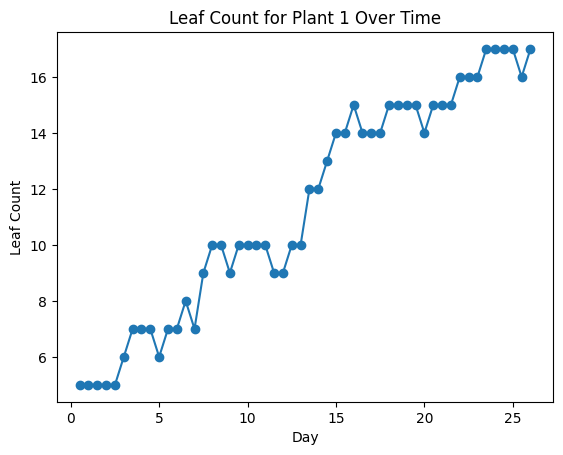

In [21]:
# Task 7 evaluation
df = pd.read_csv(ara_pheno_path)
# Filter for plant 1
df_plant1 = df[df['plant_id'] == 1]

# Sort by day (optional, but often helpful before plotting)
df_plant1 = df_plant1.sort_values(by='days_after_sowing')

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot day on the x-axis and leaf count on the y-axis
ax.plot(df_plant1['days_after_sowing'], df_plant1['leaf_count'], marker='o', linestyle='-')

# Add labels and a title
ax.set_xlabel('Day')
ax.set_ylabel('Leaf Count')
ax.set_title('Leaf Count for Plant 1 Over Time')

# Save the plot as a PNG file
output_path = './results_for_eval/task7_gt.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# (Optional) Show the plot in a window (if running interactively)
# plt.show()

print(f"Plot saved to {output_path}")

In [22]:
# Task 8: Generating Plots
task = f'''
Given {ara_pheno_path}, create a bar chart of leaf count for every plant at day 26. Save the plot at ./results_for_eval/task8.png.
'''
res = user_proxy.initiate_chat(recipient=manager, message=task,)
# correct

Admin (to manager):


Given ./data_for_eval/aracrop_phenotypes.csv, create a bar chart of leaf count for every plant at day 26. Save the plot at ./results_for_eval/task8.png.


--------------------------------------------------------------------------------
manager (to Admin):

***** Suggested tool call (call_UOE4I0FOOm2wkGY7p4OvxVZk): plot_from_csv *****
Arguments: 
{"message":"Create a bar chart of leaf count for every plant at day 26.","file_path":"./data_for_eval/aracrop_phenotypes.csv","save_path":"./results_for_eval/task8.png"}
******************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION plot_from_csv...
code_executor (to data_visualiser):

Create a bar chart of leaf count for every plant at day 26.. The file to be analysed: "./data_for_eval/aracrop_phenotypes.csv", which contains column n

Bar chart saved to ./results_for_eval/task8_gt.png


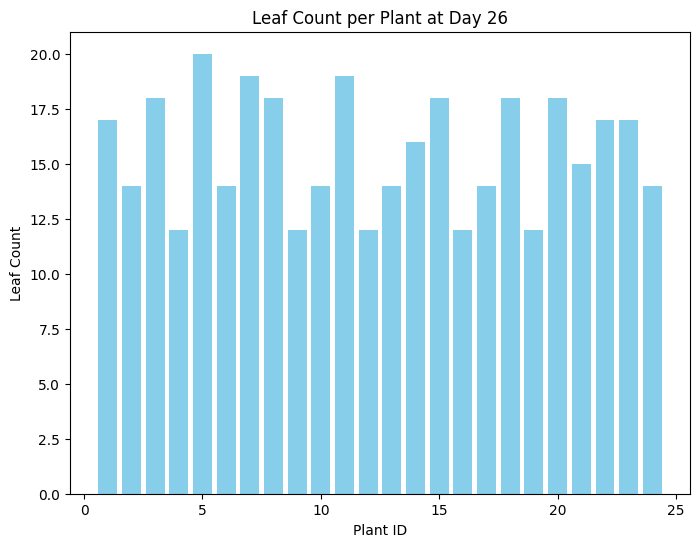

In [23]:
# Task 8 evaluation
df = pd.read_csv(ara_pheno_path)
df_day26 = df[df['days_after_sowing'] == 26]
# Sort by plant ID (to have a nice order in the bar chart)
df_day26 = df_day26.sort_values(by='plant_id')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar chart
ax.bar(df_day26['plant_id'], df_day26['leaf_count'], color='skyblue')

# Label the axes and set a title
ax.set_xlabel('Plant ID')
ax.set_ylabel('Leaf Count')
ax.set_title('Leaf Count per Plant at Day 26')

# If plant IDs are large or non-numeric, you might need to rotate x-labels:
# plt.xticks(rotation=90)

# Save the figure
output_path = './results_for_eval/task8_gt.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# (Optional) Show the plot if you’re running this interactively
# plt.show()

print(f"Bar chart saved to {output_path}")


In [24]:
# Task 9: Generating Plots
task = f'''
Given {potato_pheno_path}, use bar charts to plot the manually measured dried weight for every plant. Save the plot at ./results_for_eval/task9.png.
'''
res = user_proxy.initiate_chat(recipient=manager, message=task,)
# correct

Admin (to manager):


Given ./data_for_eval/potato_metadata.csv, use bar charts to plot the manually measured dried weight for every plant. Save the plot at ./results_for_eval/task9.png.


--------------------------------------------------------------------------------
manager (to Admin):

***** Suggested tool call (call_tqXKqbnehAFSu15TYZYbqZAk): plot_from_csv *****
Arguments: 
{"message":"Plot the manually measured dried weight for every plant using bar charts.","file_path":"./data_for_eval/potato_metadata.csv","save_path":"./results_for_eval/task9.png"}
******************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION plot_from_csv...
code_executor (to data_visualiser):

Plot the manually measured dried weight for every plant using bar charts.. The file to be analysed: "./data_for_eval/potato_meta

Plot saved to ./results_for_eval/task9_gt.png


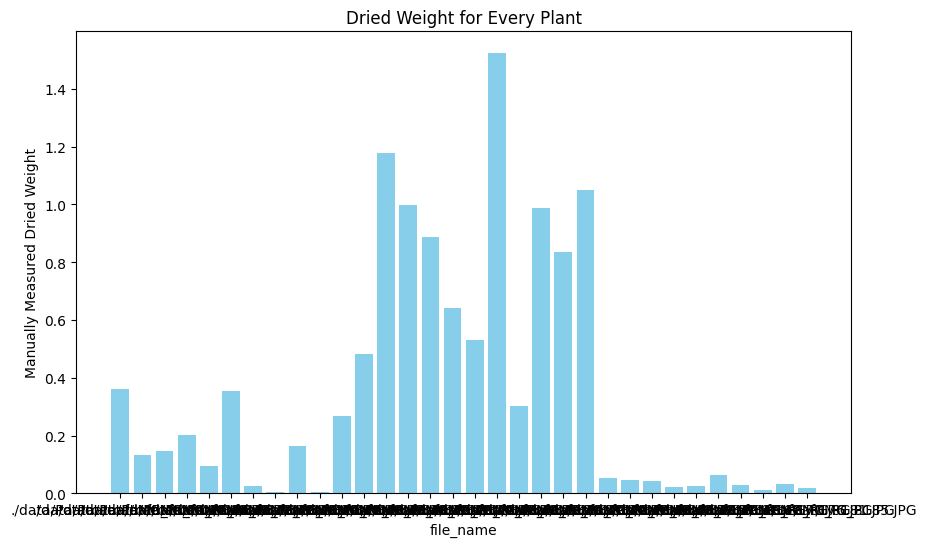

In [25]:
# Task 9 evaluation
df = pd.read_csv(potato_pheno_path)
df_sorted = df.sort_values(by='file_name')
fig, ax = plt.subplots(figsize=(10, 6))

# 4. Create a bar chart of dried weight vs plant ID
ax.bar(df_sorted['file_name'], df_sorted['manual_dried_weight'], color='skyblue')

# 5. Label the axes and set a title
ax.set_xlabel('file_name')
ax.set_ylabel('Manually Measured Dried Weight')
ax.set_title('Dried Weight for Every Plant')

# (Optional) If you have many plant IDs or long IDs, you can rotate x-axis labels:
# plt.xticks(rotation=90)

# 6. Save the plot in the ./daeval directory
output_path = './results_for_eval/task9_gt.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# (Optional) Show the plot interactively (if desired)
# plt.show()

print(f"Plot saved to {output_path}")

In [26]:
# Task 10: Generating Plots
task = f'''
Given {potato_pheno_path}, create a histogram for manually measured leaf area for every plant. Save the plot at ./results_for_eval/task10.png.
'''
res = user_proxy.initiate_chat(recipient=manager, message=task,)

Admin (to manager):


Given ./data_for_eval/potato_metadata.csv, create a histogram for manually measured leaf area for every plant. Save the plot at ./results_for_eval/task10.png.


--------------------------------------------------------------------------------
manager (to Admin):

***** Suggested tool call (call_udxIU2I7L78GfU8HA8kwRIcV): plot_from_csv *****
Arguments: 
{"message":"Create a histogram for manually measured leaf area for every plant.","file_path":"./data_for_eval/potato_metadata.csv","save_path":"./results_for_eval/task10.png"}
******************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION plot_from_csv...
code_executor (to data_visualiser):

Create a histogram for manually measured leaf area for every plant.. The file to be analysed: "./data_for_eval/potato_metadata.csv", which 

Histogram saved to ./results_for_eval/task10_gt.png


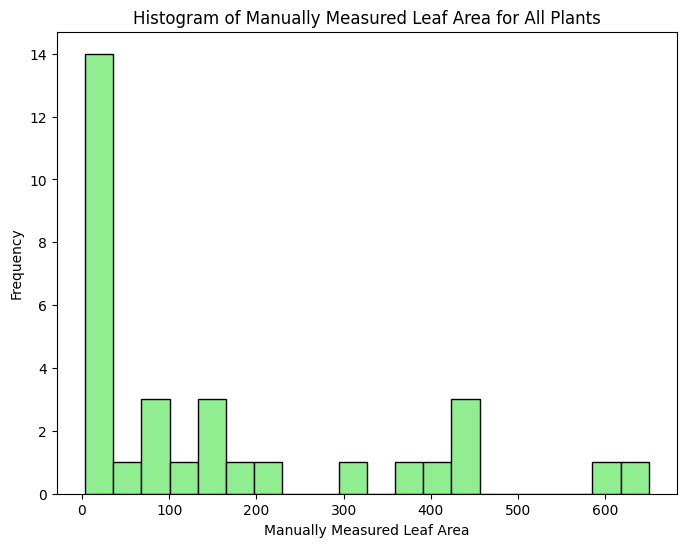

In [27]:
# Task 8: (plot, coding) Given ./daeval/potato_metadata.csv, create a histogram for manually measured leaf area for every plant. Save the plot at ./daeval.
df = pd.read_csv(potato_pheno_path)

# Extract the column containing manually measured leaf area
leaf_area = df['manual_leaf_area'].dropna()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram
# The 'bins' parameter controls how many bins (intervals) are used.
ax.hist(leaf_area, bins=20, color='lightgreen', edgecolor='black')

# Label the axes and give the plot a title
ax.set_xlabel('Manually Measured Leaf Area')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Manually Measured Leaf Area for All Plants')

# Save the figure in the ./daeval directory
output_path = './results_for_eval/task10_gt.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# (Optional) If running interactively, you can display the plot
# plt.show()

print(f"Histogram saved to {output_path}")